# Régression linéaire multiple




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

from google.colab import drive
drive.mount('/content/drive')
ozone = pd.read_csv('/content/drive/My Drive/ColabNotebooks/data/ozone.txt', sep=";", decimal='.')
print(ozone.head())

Mounted at /content/drive
       Date    O3   T12   T15  Ne12  ...  W12     Vx    O3v  nebulosite   vent
0  19960422  63.6  13.4  15.0     7  ...    0   9.35   95.6       NUAGE    EST
1  19960429  89.6  15.0  15.7     4  ...    0   5.40  100.2      SOLEIL   NORD
2  19960506  79.0   7.9  10.1     8  ...    0  19.30  105.6       NUAGE    EST
3  19960514  81.2  13.1  11.7     7  ...    0  12.60   95.2       NUAGE   NORD
4  19960521  88.0  14.1  16.0     6  ...    6 -20.30   82.8       NUAGE  OUEST

[5 rows x 13 columns]


On commence par une visualisation graphique du nuage de points. **Comme on peut le constater, cette représentation est loin d'être exploitable**, nous verrons plus loin d'autres représentations améliorant l'interprétation. 

Text(0.5, 0.92, 'Nuage de points : O3 en fonction de T12 et Vx')

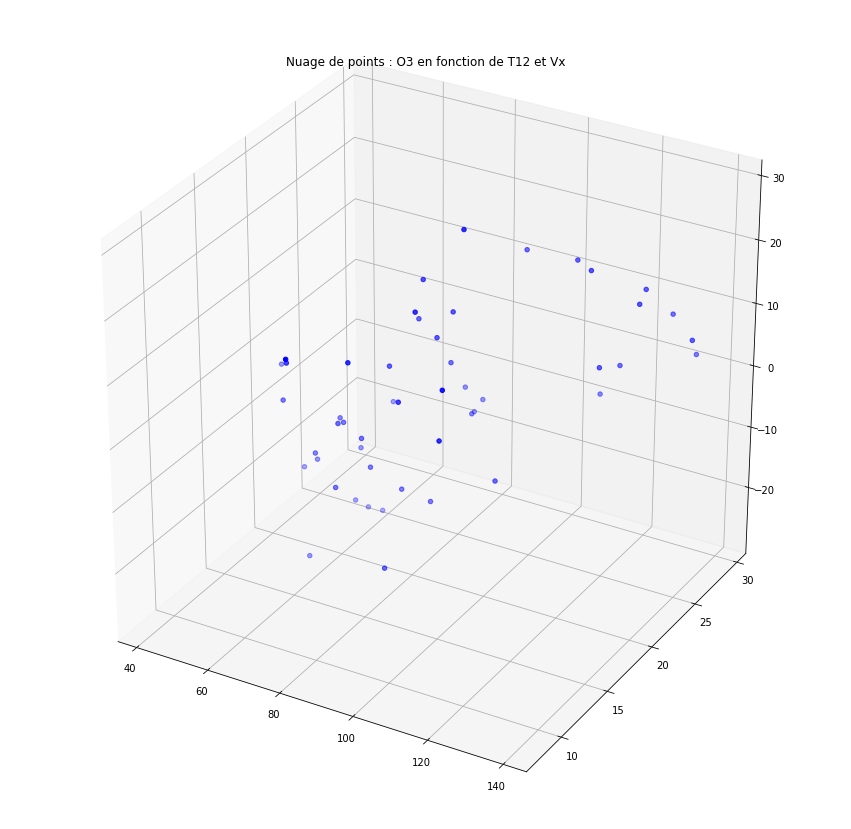

In [4]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection = "3d")

ax.scatter3D(ozone['O3'],ozone['T12'],ozone['Vx'], color="blue")

plt.title("Nuage de points : O3 en fonction de T12 et Vx")

À l'aide de la librairie `statsmodels`, on ajuste le modèle de régression ${\rm O3}=\beta_0+\beta_1{\rm T12}+\beta_3{\rm Vx}+\varepsilon$ en utiliant les moindres carrés ordinaires.

Ici, nous appelons la fonction `summary2` afin d'avoir l'estimation de la variance de l'erreur $\varepsilon$.

In [5]:
reg = smf.ols('O3~T12+Vx',data=ozone).fit()
reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.505   
Dependent Variable: O3               AIC:                427.0664
Date:               2020-09-14 14:09 BIC:                432.8025
No. Observations:   50               Log-Likelihood:     -210.53 
Df Model:           2                F-statistic:        25.96   
Df Residuals:       47               Prob (F-statistic): 2.54e-08
R-squared:          0.525            Scale:              282.97  
------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      35.4530   10.7446  3.2996  0.0019  13.8377  57.0683
T12             2.5380    0.5151  4.9270  0.0000   1.5017   3.5744
Vx              0.8736    0.1772  4.9309  0.0000   0.5172   1.2300
-----------------------------------------------------------------
Omnibus:              0.280        Durbin-Watson:           1.678
Prob(Omnibus):        0.869        Jarque-Bera (JB):        0.331
Skew:                 0.165        Prob(JB):                0.848
Kurtosis:             2.777        Condition No.:           94   
=================================================================

"""

Ces valeurs sont à comparer avec les sorties $R$ de [https://regression-avec-r.github.io/](https://regression-avec-r.github.io/). 

Avec les notations du cours, le $R^2$ est de 0.525 alors le $R^2$ ajusté vaut 0.505. Ces valeurs s'interprètent comme une qualité d'ajustement plutôt moyenne.

Nous retrouvons sur cette sortie le nombre de degrés de liberté associé à l'estimation de $\sigma^2$ : $n-p-1=50-2-1=47$. L'estimation de la variance $\hat \sigma^2$ vaut 282.97. 

On vérifie que l'écart-type estimé correspond à la valeur trouvée en R.

In [6]:
np.sqrt(reg.scale)

16.821591067708145

Finalement, le modèle ajusté s'écrit ${\rm O3}=35.453+2.538 {\rm T12}+0.8736 {\rm Vx}$. Le second tableau donne également l'écart-type estimé $\hat \beta_j$ pour chaque coefficient de la régression à l'aide de l'identité 

$$
\hat \sigma_{\hat \beta_j} = \sqrt{\hat \sigma^2 [(X^\ast X)^{-1}]_{jj}}
$$

Dans notre cas, $\hat \sigma_{\hat \beta_0} = 10.7446$, $\hat \sigma_{\hat \beta_1} = 0.5151$ et $\hat \sigma_{\hat \beta_2} = 0.1772$. 

# Le modèle gaussien

Cette fois-ci, on considère le modèle ${\rm O3}=\beta_0+\beta_1 {\rm T12} + \beta_2 {\rm Vx} + \beta_3 {\rm Ne12} + \varepsilon$.

In [7]:
reg2 = smf.ols('O3~T12+Vx+Ne12',data=ozone).fit()
reg2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.661   
Dependent Variable: O3               AIC:                409.0090
Date:               2020-09-14 14:09 BIC:                416.6571
No. Observations:   50               Log-Likelihood:     -200.50 
Df Model:           3                F-statistic:        32.87   
Df Residuals:       46               Prob (F-statistic): 1.66e-11
R-squared:          0.682            Scale:              193.58  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
Intercept    84.5473   13.6067   6.2136  0.0000  57.1584  111.9362
T12           1.3150    0.4974   2.6438  0.0112   0.3138    2.3163
Vx            0.4864    0.1675   2.9033  0.0057   0.1492    0.8237
Ne12         -4.8934    1.0270  -4.7647  0.0000  -6.9606   -2.8261
-----------------------------------------------------------------
Omnibus:               0.211        Durbin-Watson:          1.758
Prob(Omnibus):         0.900        Jarque-Bera (JB):       0.411
Skew:                  -0.050       Prob(JB):               0.814
Kurtosis:              2.567        Condition No.:          148  
=================================================================

"""

Le théorème du cours l'intervalle de confiance pour chaque coefficient de la régression à l'aide des expression suivante :

$$
IC(\beta_j,95\%)= \left [ \hat \beta_j - t_{46}(0.975)\hat \sigma_{\hat \beta_j} ; \hat \beta_j + t_{46}(0.975)\hat \sigma_{\hat \beta_j} \right ].
$$

Pour chaque coefficient, l'IC de niveau $95\%$ est donné dans le tableau du `summary2`. (La différence avec le résultat fourni par Cornillon-Matzner en 2007 vient du $0.95$ passé à `qt` en lieu est place de $0.975$ ; cette coquille a été corrigée dans la dernière édition de 2019 ; l'IC que les auteurs calculent correspond en réalité à un niveau de $90\%$).
 

In [8]:
reg2.conf_int(0.1)

,0,1
Intercept,61.706262,107.388404
T12,0.480063,2.150029
Vx,0.205187,0.767704
Ne12,-6.617350,-3.169395


Comme rappelé dans la [documentation](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.conf_int.html#statsmodels.regression.linear_model.RegressionResults.conf_int) de `statsmodels`, le calcul de l'IC est basé sur la distribution de Student qui n'est valide **que dans le modèle gaussien !**. Aussi, ces IC ne peuvent s'interpréter correctement que si l'hypothèse gaussienne est raisonnable, ce que nous avons omis de vérifier ici !

La ligne `F-statistic` de la sortie Python de `statsmodels` donne la valeur de la statistique de test pour le test
$$
\mathcal H_0 : \beta_1=\cdots=\beta_p=0
 \quad \textrm{contre} \quad \mathcal H_1 : \exists j : \beta_j \neq 0.
$$
Cette statistique de test suit sous $\mathcal H_0$ une loi de Fisher à $(3,46)$ degrés de libertés (donnés par `Df Model` et `Df Residuals` respectivement). La lecture d'une table pour la loi de Fisher nous ferait rejeter l'hypothèse $\mathcal H_0$ au niveau $\alpha=5\%$ : au moins une des trois variables inclues dans le modèle parmi ${\rm T12}, {\rm Vx}, {\rm Ne12}$ influe sur la concentration en ozone (est corrélée). Nous aboutissons à la même conclusion en lisant la valeur de la $p$-value que l'on peut lire sur la sortie à la ligne `Prob (F-statistic)`.

En tout état de cause, on devrait a minima se poser la question de la pertinence du modèle dans le cas où l'on est amené à accepter $\mathcal H_0$.

Les colonnes `t` et `P>|t|` indiquent respectivement, et coefficients par coefficients, la valeur de la statistique et la $p$-value associée pour le test de Fisher 
$$
\mathcal H_0 : \beta_j=0 \quad \textrm{contre} \quad \beta_j \neq 0.
$$
Au niveau de risque $\alpha=5\%$, on rejette l'hypothèse $\mathcal H_0$ pour tous les coefficients (y compris l'intercept). 

Il est possible de réaliser le test de Fisher général (modèles emboîtés) :
$$
\mathcal H_0 : \beta_3 = 0 \quad \textrm{contre} \quad \mathcal H_1 : \beta_1 \neq 0.
$$

In [9]:
reg2.compare_f_test(reg)

(22.702785190755073, 1.9270727148717155e-05, 1.0)

La première valeur retournée est la valeur de la statistique de test $F$, puis la $p$-value associée, enfin la troisième valeur représente la différence des degrés de libertés entre les deux modèles.

Dans le cas présent, ce test est équivalent au test de Student sur $\beta_3$ effectué plus haut : la $p$-value est du même ordre de grandeur (troncature dû à l'affichage) mais surtout le carré de $t=-4.7647$ est $22.7023$ c'est à dire, aux erreurs d'arrondis près, la valeur de la statistique de Fisher.

Techniquement en Python, on vérifiera que `reg` est bien un sous-modèle de `reg2` c'est à dire que toutes les variables explicatives inclues dans `reg` sont également inclues dans `reg2`. **Le programme n'est pas censé le vérifier à votre place !**

La librairie `statsmodels` expose une fonction de prédiction `predict`.

On commence par afficher les paramètres de la régression.

In [10]:
print(reg2.params)

Intercept    84.547333
T12           1.315046
Vx            0.486446
Ne12         -4.893373
dtype: float64


Puis, on calcule la valeur prédite pour les valeurs $T12=5$, $Vx=0$ et $Ne12=3$.

In [11]:
print(reg2.predict(exog=dict(T12=5,Vx=0,Ne12=3)))


0    76.442444
dtype: float64


On peut vérifier ce calcul manuellement.

In [12]:
p = reg2.params
print(p['Intercept']+p['T12']*5+p['Ne12']*3)

76.44244350851261


En général, on s'intéresse également aux garanties théoriques sur la valeur prédite. La fonction `get_prediction` est un peu plus évoluée et permet d'obtenir l'intervalle de confiance de la prédiction. Dans l'exemple déjà considéré ($T12=5$, $Vx=0$ et $Ne12=3$), on obtient : 

In [13]:
ypred = reg2.get_prediction(exog=dict(T12=5,Vx=0,Ne12=3))
ypred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,76.442444,9.048206,58.22935,94.655537,43.035121,109.849766


La colonne `mean` indique la valeur prédite $\hat y=u^\ast \hat \beta$. La colonne `mean_se` donne l'écart-type de l'erreur due à l'estimation des paramètres du modèle :
$$
\hat \sigma \sqrt{u^\ast (X^\ast X)^{-1}u}
$$ 

Les colonnes `mean_ci_lower` et `mean_ci_upper` sont les bornes inférieures et supérieures de l'intervalle de confiance pour l'estimation de la moyenne :
$$
\left [ u^\ast \hat \beta - t_{n-p-1,\alpha/2} \hat \sigma \sqrt{u^\ast (X^\ast X)^{-1}u} ; u^\ast \hat \beta + t_{n-p-1,\alpha/2} \hat \sigma \sqrt{u^\ast (X^\ast X)^{-1}u} \right ].
$$
La valeur `alpha` renseignée dans la fonction `summary_frame` correspond au niveau de risque supporté, pour un intervalle de confiance bilatéral, une masse $\alpha/2$ est donc attribué à gauche et à droite de l'intervalle.

Enfin, les colonnes `obs_ci_lower` et `obs_ci_upper` sont les bornes inférieures et supérieures de l'intervalle de confiance de prédiction :
$$
\left [ u^\ast \hat \beta - t_{n-p-1,\alpha/2} \hat \sigma \sqrt{u^\ast (X^\ast X)^{-1}u+1} ; u^\ast \hat \beta + t_{n-p-1,\alpha/2} \hat \sigma \sqrt{u^\ast (X^\ast X)^{-1}u+1} \right ].
$$
Ce deuxième est intervalle contient toujours le premier et intègre le risque introduit par $\varepsilon$.

Il est possible d'accéder à ces valeurs comme suit :


In [14]:
print("Valeur prédite :"+str(ypred.predicted_mean))
print("Écart-type :"+str(np.sqrt(ypred.var_pred_mean)))
print("Intervalle de confiance de l'estimation de la moyenne :"+str(ypred.conf_int(alpha=0.05)))
print("Écart-type de l'estimation de la moyenne :"+str(ypred.se_mean))
print("Écart-type de la prédiction :"+str(ypred.se_obs))

Valeur prédite :[76.44244351]
Écart-type :[9.04820593]
Intervalle de confiance de l'estimation de la moyenne :[[58.22934966 94.65553736]]
Écart-type de l'estimation de la moyenne :[9.04820593]
Écart-type de la prédiction :[16.59664935]


En particulier, la dernière valeur correspond au calcul de :
$$
\hat \sigma \sqrt{u^\ast (X^\ast X)^{-1}u+1}.
$$
Ce que nous vérifions :

In [15]:
from scipy import stats

qpred = stats.t.interval(alpha=0.95,df=reg2.df_resid) # qpred contient la borne inférieure et supérieure
ic_pred = ypred.predicted_mean + qpred*ypred.se_obs
print(ic_pred)

[ 43.03512115 109.84976587]


# Données synthétiques

Cette partie explique comment simuler un modèle linéaire gaussien.

Nous considérons donc le modèle $Y=X\beta+\varepsilon$ où $\varepsilon \sim \mathcal N(0,\sigma^2 \mathrm{id})$.

Pour simuler un tel modèle, il nous faut choisir $\beta \in \mathbb R^p$, $\sigma^2 > 0$ et $n$ la taille de l'échantillon. Dans la suite $\beta=(10,-2,5,0.1)$, $\sigma^2=2.5$ et $n=20$.

Le vecteur de bruit s'obtient come suit :

In [135]:
beta = np.array([[10],[-2],[5],[0.1]])
n=20
sigma = 2.5
noise = np.random.normal(0,sigma,size=(n,1))
noise.shape

(20, 1)

En toute théorie, il faudrait construire une matrice $X$ de taille $100 \times (3+1)$. Rappelons que le modèle linéaire ne fait pas d'hypothèses particulières sur $X$ mise à part la condition (HS). 

Pour simplifier, nous allons générer $X$ aléatoirement. Chaque colonne représente les observations pour une variable explicative. La première colonne ne contient que des 1 car nous introduisons la variable constante.

On peut choisir les valeurs comme on veut mais le plus simple est de les générer aléatoirement. Afin de montrer que l'hypothèse importante concerne la oi du bruit, nous alons donc générer 3 colonnes aléatoires selon des distributions plus pu moins arbitraires. 

In [136]:
x1 = np.random.uniform(-1,3,n)
x2 = np.random.poisson(1,n)
x3 = np.random.normal(5,3,n)
X = sm.add_constant(np.column_stack((x1,x2,x3)))
X.shape

(20, 4)

Dans ce contexte, on imagine que les valeurs de $X$ ont été mesurées et on calcule $Y$ par la formule $Y=X\beta+\varepsilon$.

In [137]:
response=X.dot(beta)+noise
response.shape

(20, 1)

In [138]:
reg_sim = sm.OLS(response,X).fit()
reg_sim.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.781   
Dependent Variable: y                AIC:                96.6380 
Date:               2020-09-14 15:43 BIC:                100.6210
No. Observations:   20               Log-Likelihood:     -44.319 
Df Model:           3                F-statistic:        23.53   
Df Residuals:       16               Prob (F-statistic): 4.15e-06
R-squared:          0.815            Scale:              6.1544  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     11.0490     1.2787    8.6410   0.0000    8.3384   13.7597
x1        -1.1208     0.4777   -2.3464   0.0322   -2.1335   -0.1082
x2         5.3720     0.6849    7.8436   0.0000    3.9201    6.8239
x3        -0.4159     0.2377   -1.7497   0.0993   -0.9199    0.0880
-----------------------------------------------------------------
Omnibus:               0.540        Durbin-Watson:          1.594
Prob(Omnibus):         0.763        Jarque-Bera (JB):       0.602
Skew:                  -0.316       Prob(JB):               0.740
Kurtosis:              2.432        Condition No.:          13   
=================================================================

"""

# Outils de diagnostique

À venir.
